In [10]:
import torch 
from ClassifierModel import Classifier
from Data import NDataset
from loss import CrossEntropyLoss 
#import torch.optim as optimizer

In [11]:
model = Classifier()

train_dataset = NDataset(annotation_file_dir = "/Users/nellygarcia/Documents/GitHub/PythonNelly/VGGSoundClassification",
                    embed_dir='/Users/nellygarcia/Documents/GitHub/PythonNelly/VGGSoundClassification/embeddings',
                    division='train'
                    )

test_dataset = NDataset(annotation_file_dir = "/Users/nellygarcia/Documents/GitHub/PythonNelly/VGGSoundClassification",
                    embed_dir='/Users/nellygarcia/Documents/GitHub/PythonNelly/VGGSoundClassification/embeddings',
                    division='test')
    
validation_dataset = NDataset(annotation_file_dir = "/Users/nellygarcia/Documents/GitHub/PythonNelly/VGGSoundClassification",
                    embed_dir='/Users/nellygarcia/Documents/GitHub/PythonNelly/VGGSoundClassification/embeddings',
                    division='validation'
                    )


train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)
validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)

found 1293 samples
found 32 categories
found 161 samples
found 32 categories
found 162 samples
found 32 categories


In [12]:
from ClassifierModel import Classifier

m = Classifier()
m(torch.rand(12, 5, 128)).shape

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
import matplotlib.pyplot as plt
def plot_loss_curve(train_loss, epochs):
   train_loss
   plt.figure()
   plt.plot(range(epochs), train_loss, label='embeddings')
   #plt.plot(epochs, val_loss, label='val')
   plt.legend()
   plt.show()

700 Loss: 65.9565 Acc: 0.0928
Epoch [1/700], Loss: 21320.4277
700 Loss: 59.0189 Acc: 0.0928
Epoch [2/700], Loss: 19077.8477
700 Loss: 68.2174 Acc: 0.0944
Epoch [3/700], Loss: 22051.2832
700 Loss: 63.2763 Acc: 0.0928
Epoch [4/700], Loss: 20454.0547
700 Loss: 70.2872 Acc: 0.0928
Epoch [5/700], Loss: 22720.3398
700 Loss: 66.1069 Acc: 0.0928
Epoch [6/700], Loss: 21369.0605
700 Loss: 59.1444 Acc: 0.0944
Epoch [7/700], Loss: 19118.4141
700 Loss: 53.2042 Acc: 0.0944
Epoch [8/700], Loss: 17198.2441
700 Loss: 50.8878 Acc: 0.0944
Epoch [9/700], Loss: 16449.4844
700 Loss: 44.7809 Acc: 0.0928
Epoch [10/700], Loss: 14475.4209
700 Loss: 35.1700 Acc: 0.0928
Epoch [11/700], Loss: 11368.6992
700 Loss: 31.2233 Acc: 0.0928
Epoch [12/700], Loss: 10092.9258
700 Loss: 27.3667 Acc: 0.0959
Epoch [13/700], Loss: 8846.2910
700 Loss: 22.7792 Acc: 0.0944
Epoch [14/700], Loss: 7363.3774
700 Loss: 17.9553 Acc: 0.0959
Epoch [15/700], Loss: 5804.0469
700 Loss: 15.5382 Acc: 0.0944
Epoch [16/700], Loss: 5022.7285
700 L

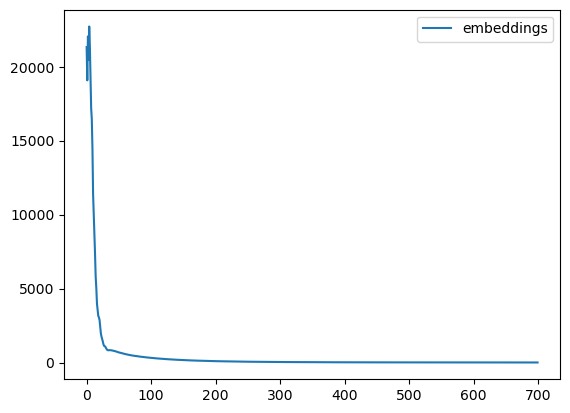

In [14]:
from sklearn.metrics import accuracy_score, f1_score
criterion = torch.nn.CrossEntropyLoss()
max_epochs = 700
train_loss = []    
# training loop
for epoch in range(max_epochs):
    loss = 0
    running_loss = 0.0
    running_corrects = 0
    for batch in train_dataloader:
        # forward pass
        inputs, targets = batch
        targets = targets.float()

        #print("targets",targets.shape)
        outputs = model(inputs)
        #print("outputs",outputs.shape)
        #print(outputs[...,0])
        # calculate the loss
        loss += criterion(outputs, targets)
        # backward pass
        _, predictions = torch.max(outputs, 1)  # get the predicted class
        # Convert predictions to one-hot
        predictions = torch.nn.functional.one_hot(predictions, num_classes=32)
       # print("predictions",predictions.shape)
        
        # flatten predictions and targets
        #all_preds.extend(predictions.cpu().numpy())
        #all_targets.extend(targets.cpu().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #accuracy = accuracy_score(all_targets, all_preds)
    #f1 = f1_score(all_targets, all_preds, average='weighted')
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(predictions == targets)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    epoch_acc = running_corrects.double() / len(train_dataloader.dataset)

    print(f'{max_epochs} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
   
    #print(f'Epoch [{epoch}/{max_epochs}], Loss: {loss.item()}')
    print(f'Epoch [{epoch+1}/{max_epochs}], Loss: {loss.item():.4f}')
    train_loss.append(loss.item())
    #train_acc.append(accuracy)
plot_loss_curve(train_loss, max_epochs)
        


Testing

700 Loss: 1.5327 Acc: 0.7950
Epoch [1/700], Loss: 61.6931
700 Loss: 1.5555 Acc: 0.7826
Epoch [2/700], Loss: 62.6095
700 Loss: 1.5555 Acc: 0.7826
Epoch [3/700], Loss: 62.6086
700 Loss: 1.5356 Acc: 0.7702
Epoch [4/700], Loss: 61.8096
700 Loss: 1.4991 Acc: 0.7702
Epoch [5/700], Loss: 60.3387
700 Loss: 1.5554 Acc: 0.7950
Epoch [6/700], Loss: 62.6058
700 Loss: 1.5141 Acc: 0.7826
Epoch [7/700], Loss: 60.9406
700 Loss: 1.5541 Acc: 0.7950
Epoch [8/700], Loss: 62.5519
700 Loss: 1.5177 Acc: 0.7826
Epoch [9/700], Loss: 61.0876
700 Loss: 1.5530 Acc: 0.7702
Epoch [10/700], Loss: 62.5071
700 Loss: 1.5553 Acc: 0.7826
Epoch [11/700], Loss: 62.6028
700 Loss: 1.5537 Acc: 0.7950
Epoch [12/700], Loss: 62.5353
700 Loss: 1.5555 Acc: 0.7702
Epoch [13/700], Loss: 62.6095
700 Loss: 1.5270 Acc: 0.7950
Epoch [14/700], Loss: 61.4624
700 Loss: 1.5555 Acc: 0.7826
Epoch [15/700], Loss: 62.6096
700 Loss: 1.5366 Acc: 0.7826
Epoch [16/700], Loss: 61.8467
700 Loss: 1.5555 Acc: 0.7702
Epoch [17/700], Loss: 62.6079
700 Lo

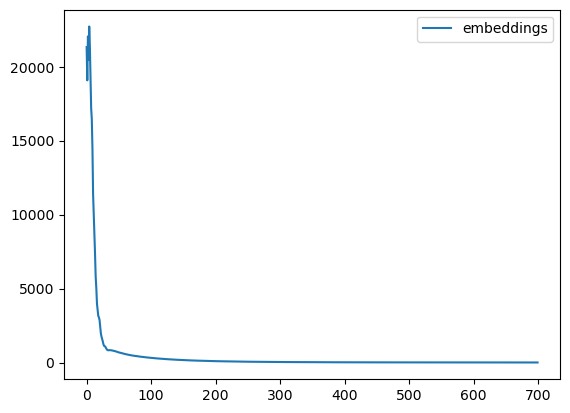

In [15]:
criterion = torch.nn.CrossEntropyLoss()
max_epochs = 700
test_loss = []    
# training loop
for epoch in range(max_epochs):
    loss = 0
    running_loss = 0.0
    running_corrects = 0
    for batch in test_dataloader:
        # forward pass
        inputs, targets = batch
        targets = targets.float()
        outputs = model(inputs)
        loss += criterion(outputs, targets)
        _, predictions = torch.max(outputs, 1)  # get the predicted class
        predictions = torch.nn.functional.one_hot(predictions, num_classes=32)
    
    optimizer.zero_grad()
   
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(predictions == targets)

    epoch_loss = running_loss / len(test_dataloader.dataset)
    epoch_acc = running_corrects.double() / len(test_dataloader.dataset)

    print(f'{max_epochs} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
   
    print(f'Epoch [{epoch+1}/{max_epochs}], Loss: {loss.item():.4f}')
    test_loss.append(loss.item())
    
plot_loss_curve(train_loss, max_epochs)

Validation

In [17]:
criterion = torch.nn.CrossEntropyLoss()
max_epochs = 700
test_loss = []    
# training loop
for epoch in range(max_epochs):
    loss = 0
    running_loss = 0.0
    running_corrects = 0
    for batch in validation_dataloader:
        # forward pass
        inputs, targets = batch
        targets = targets.float()
        outputs = model(inputs)
        loss += criterion(outputs, targets)
        _, predictions = torch.max(outputs, 1)  # get the predicted class
        predictions = torch.nn.functional.one_hot(predictions, num_classes=32)
    
    optimizer.zero_grad()
   
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(predictions == targets)

    epoch_loss = running_loss / len(validation_dataloader.dataset)
    epoch_acc = running_corrects.double() / len(validation_dataloader.dataset)

    print(f'{max_epochs} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
   
    print(f'Epoch [{epoch+1}/{max_epochs}], Loss: {loss.item():.4f}')
    test_loss.append(loss.item())
    
plot_loss_curve(validation_loss, max_epochs)

700 Loss: 1.1159 Acc: 0.7654
Epoch [1/700], Loss: 45.1936
700 Loss: 1.0880 Acc: 0.7901
Epoch [2/700], Loss: 44.0660
700 Loss: 1.1394 Acc: 0.7778
Epoch [3/700], Loss: 46.1463
700 Loss: 1.1395 Acc: 0.7654
Epoch [4/700], Loss: 46.1494
700 Loss: 1.1395 Acc: 0.7778
Epoch [5/700], Loss: 46.1480
700 Loss: 1.1329 Acc: 0.7778
Epoch [6/700], Loss: 45.8813
700 Loss: 1.1271 Acc: 0.7778
Epoch [7/700], Loss: 45.6476
700 Loss: 1.1370 Acc: 0.7901
Epoch [8/700], Loss: 46.0495
700 Loss: 1.1346 Acc: 0.7654
Epoch [9/700], Loss: 45.9500
700 Loss: 1.1376 Acc: 0.7531
Epoch [10/700], Loss: 46.0747
700 Loss: 1.1348 Acc: 0.7778
Epoch [11/700], Loss: 45.9574
700 Loss: 1.1395 Acc: 0.7901
Epoch [12/700], Loss: 46.1496
700 Loss: 1.1394 Acc: 0.7778
Epoch [13/700], Loss: 46.1473
700 Loss: 1.1392 Acc: 0.7654
Epoch [14/700], Loss: 46.1375
700 Loss: 1.1395 Acc: 0.7901
Epoch [15/700], Loss: 46.1484
700 Loss: 1.0967 Acc: 0.7778
Epoch [16/700], Loss: 44.4158
700 Loss: 1.1395 Acc: 0.7778
Epoch [17/700], Loss: 46.1492
700 Lo

NameError: name 'validation_loss' is not defined

In [18]:
torch.load("/Users/nellygarcia/Documents/GitHub/PythonNelly/VGGSoundClassification/embeddings/f_n_GunshotRealtwotimes10-15.pt")

tensor([[150.,  22., 121.,  74., 255.,  90., 113.,  37., 139., 187., 137.,  41.,
         150., 255.,   0.,  89., 231., 106., 242., 126.,  80., 255.,   0., 124.,
          39., 255.,   0., 255.,  96., 184., 154., 155., 157.,  15.,   0.,   0.,
          43., 108.,  69., 217., 140., 179.,   0., 177., 155., 127.,   0., 149.,
         255., 255., 255.,  91.,  53.,   0., 255., 255., 255.,   0., 255., 133.,
         242.,  29., 112.,   0., 150., 225.,   0.,   0.,  74., 166.,  88.,   0.,
         255., 255., 178., 173.,  56., 255.,   0., 218., 255.,  36., 255.,   0.,
         102., 255., 255., 207., 255., 255.,   0., 203.,  82., 255., 148., 232.,
           0., 255., 255.,   0., 255., 255.,  94.,   0.,  52., 249., 255., 192.,
         255., 255., 255., 255.,   0.,   0.,   0., 255.,  27., 139.,  51., 255.,
         100.,   6., 255.,   0., 255., 168., 255., 255.],
        [178.,  40., 168., 125., 236.,  33.,  79.,  84., 112., 171., 139.,  36.,
         109., 189.,  75.,  51., 133., 150., 107., 